#Dijkstra’s Algorithm

In the following, you can find the Python class **AdjSetGraphD()** that represents a *directed weighted* graph using an adjacency set. You should implement the method **dijkstra** to find the shortest path between two vertices using Dijkstra’s algorithm.

The output of the method should be the list of vertices to traverse in order to reach the destination node starting from the source node; as an example, a path frome node 'A' to node 'E' should look like: *path = ['A', 'C', 'B', 'E']*. Use the method **print_shortest** to draw the shortest path on the graph.   

In [1]:
import networkx as nx 
from queue import PriorityQueue

class AdjSetGraphD():

    def __init__(self):
        self._vertices = {}
        
    def vertices(self):
        """ returns the vertices of a graph """
        return list(self._vertices.keys())

    def edges(self):
        """ returns the edges of a graph """
        _edges = set()
        for n1 in self._vertices:
            for n2 in self._vertices[n1]:
                _edges.add((n1,n2[0],n2[1]))
        return _edges

    def insertVertex(self, v):
        """ add a vertex """
        if v not in self._vertices:
            self._vertices[v] = set()

    def insertEdge(self, edge, weight):
        """ add an edge """
        """ assumes that edge is of type tuple or list """
        (v1, v2) = tuple(edge)
        
        self.insertVertex(v1)
        self.insertVertex(v2)
        self._vertices[v1].add((v2,weight))
        
    def incidentEdges(self, v):
        """ returns the set of edges incident on a vertex """
        incident_edges = set()
        if v in self._vertices:
            for v2 in self._vertices[v]:
                incident_edges.add((v, v2[0],v2[1]))
        return incident_edges
    
    def neighs(self, v):
        """ returns the set of neighbors of a vertex """
        if v in self._vertices:
            return self._vertices[v]
        return set()
        
    def areAdjacent(self, v1, v2):
        """ checks if the edge exists in the graph """
        if v1 not in self._vertices:
            return False
        for v in self._vertices[v1]:
            if v[0] == v2:
                return True
        return False            
    
    def removeVertex(self, v):
        """ remove a vertex """
        self._vertices.pop(v, None)
        for n in self._vertices:
            self._vertices[n].discard(v)        

    def removeEdge(self, edge):
        """ add an edge """
        (v1, v2) = tuple(edge)
        for v in self._vertices[v1]:
            if v[0] == v2:
                  self._vertices[v1].discard(v)
                  return

    def draw(self):
        """ draw the graph """
        G = nx.DiGraph()
        for e in self.edges():
            G.add_edge(e[0],e[1],weight=e[2])  
        pos = nx.circular_layout(G) 
        weight_labels = nx.get_edge_attributes(G,'weight')
        arc_rad = 0.05
        nx.draw(G, pos, with_labels = True, node_size=600, node_color='#00b4d9', connectionstyle=f'arc3, rad = {arc_rad}') 
        output = nx.draw_networkx_edge_labels(G,pos,edge_labels=weight_labels, label_pos=0.33)     

    def print_shortest(self,path):   
        """ draw the path in the graph """
        """ path is the list of the vertices to traverse """
        """ example: path = ['A', 'C', 'B', 'E'] """
        G = nx.DiGraph()
        for e in self.edges():
            G.add_edge(e[0],e[1],weight=e[2])   
        edges_path = list(zip(path,path[1:]))
        pos = nx.circular_layout(G) 
        weight_labels = nx.get_edge_attributes(G,'weight')
        arc_rad = 0.05
        edge_colors = ['black' if not edge in edges_path else 'red' for edge in G.edges()]
        nx.draw(G, pos, with_labels = True, node_size=600, node_color='#00b4d9', connectionstyle=f'arc3, rad = {arc_rad}', edge_color= edge_colors) 
        output = nx.draw_networkx_edge_labels(G,pos,edge_labels=weight_labels, label_pos=0.33)  
        
    def dijkstra(self, src, dst):
        """ find shortest path from src to dst """
        pass

    
            

We start by defining the graph (it's the one we used to describe the algorithm)

Add vertices
Add edges
Vertices of graph:
['A', 'B', 'C', 'D', 'E']
Edges of graph:
{('E', 'D', 1), ('B', 'E', 3), ('B', 'C', 3), ('A', 'B', 4), ('C', 'D', 4), ('A', 'C', 2), ('C', 'E', 5), ('C', 'B', 1), ('B', 'D', 2)}


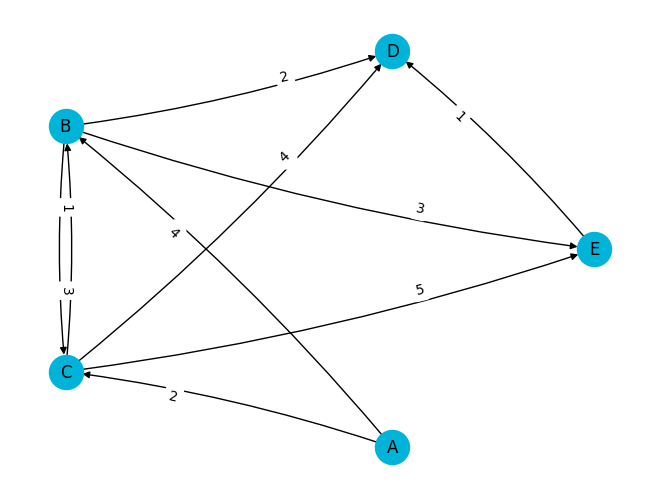

In [2]:
G = AdjSetGraphD()
print("Add vertices")
G.insertVertex("A")
G.insertVertex("B")
G.insertVertex("C")
G.insertVertex("D")
G.insertVertex("E")
print("Add edges")
G.insertEdge(("A","B"),4)
G.insertEdge(("B","D"),2)
G.insertEdge(("E","D"),1)
G.insertEdge(("C","B"),1)
G.insertEdge(("A","C"),2)
G.insertEdge(("C","D"),4)
G.insertEdge(("B","C"),3)
G.insertEdge(("B","E"),3)
G.insertEdge(("C","E"),5)
print("Vertices of graph:")
print(G.vertices())
print("Edges of graph:")
print(G.edges())
G.draw()

Now let's check your implementation!

In [3]:
G.dijkstra('A','E')